# Results of the pipeline

919


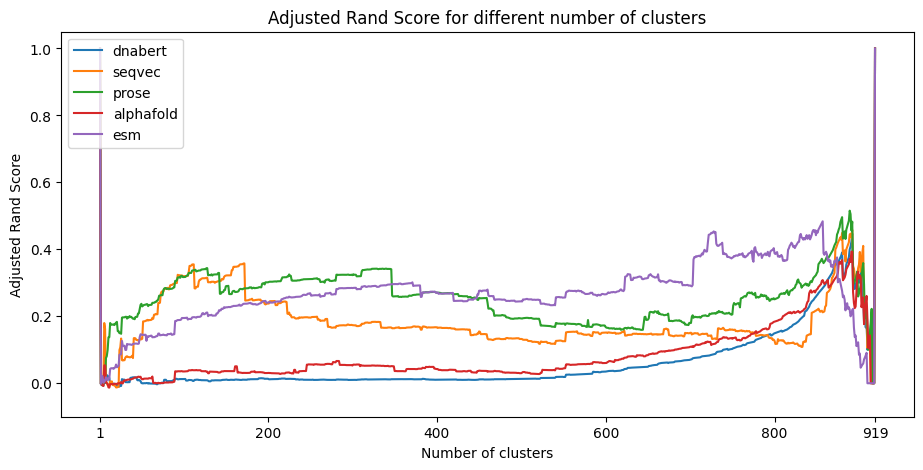

dnabert    seqvec     prose  alphafold       esm
combiner dimensional PCA                                                   
pca      10               0.168201  0.192965  0.204277   0.150438  0.300822
         50               0.201335  0.214100  0.207460   0.249978  0.336904
         all              0.202016  0.311307  0.207460   0.255305  0.441203
average  10               0.033684  0.239827  0.352076   0.178123  0.285693
         50               0.034384  0.283657  0.368744   0.251115  0.410798
         all              0.030766  0.305237  0.368631   0.251298  0.451534
sum      10               0.121470  0.169991  0.334002   0.221533  0.170013
         50               0.081429  0.147424  0.342874   0.206968  0.140108
         all              0.086504  0.111428  0.342874   0.209903  0.164091
max      10               0.021659  0.178368  0.327307   0.137835  0.273680
         50               0.055227  0.314740  0.336917   0.208555  0.385544
         all              0.062004  0.228557  0.334782   0.210308  0.387191

In [1]:
import sys
sys.path.append('..')
import pickle
from autoembedding.results_manager import results2table
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

PATH = '/storagenfs/m.tolloso/BioEmbedding/results/enrichment_results_mouse.pkl'

results = pickle.load(open(PATH, "rb"))
r, best_lst, results_dict_ars = results2table(
    results, 
    embedders= [
        "dnabert", 
        "seqvec", 
        "prose", 
        "alphafold", 
        "esm"
        ],
    combiners = ["pca", "average", "sum", "max"],
    pcas = [ '10', '50', 'all'],
    metric="mean_adjusted_rand_score", 
    
    preferred_metric_embedding="euclidean", 
    preferred_method_embedding="average", 
    
    preferred_metric_gt="euclidean", # euclidean, average: equivalent to UPGMA when the gt is the distance matrix
    preferred_method_gt="average",
    
    preferred_edge_weight="overlap",
    preferred_annotation="go"
)
# r.to_latex("./latex_output.tex")

fig, _ = plt.subplots(figsize=(11, 5))

plt.xlabel("Number of clusters")
plt.ylabel("Adjusted Rand Score")
plt.title("Adjusted Rand Score for different number of clusters")

plt.ylim(-0.1, 1.05)

X = [i for i in range(len(best_lst), 0, -1)]
print(len(best_lst))

plt.xticks([i for i in range(0, len(best_lst)+1, 200)][1:] + [1] + [len(best_lst)])

plt.plot(X, results_dict_ars['pca']['10']['dnabert'], label='dnabert')
plt.plot(X, results_dict_ars['pca']['all']['seqvec'], label='seqvec')
plt.plot(X, results_dict_ars['max']['50']['prose'], label='prose')
plt.plot(X, results_dict_ars['sum']['all']['alphafold'], label='alphafold')
plt.plot(X, results_dict_ars['max']['all']['esm'], label='esm')
plt.legend(loc = "upper left")
plt.show()
# fig.savefig(Path(PATH).stem + '.eps')
r
